<a href="https://colab.research.google.com/github/oklawyer71/cyber_security/blob/main/Clustering_exp_Cyber_Security_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages

import pandas as pd
from google.colab import files
from google.colab import drive

# Mount drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Reading in the Datasets - Segmented by Category

df_benign = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features_domain_benign_csv.csv")
df_spam = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Spam.csv")
df_phishing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_phishing.csv")
df_malware = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features-domain_Malware.csv")

In [3]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 14.9 M

In [4]:
# Here we create a variable to use so that we take a subset of 1,000 records for any sample that we use this variable in.

SUBSET_TO_USE=1000

In [5]:
# Sampling the Malware dataset

df_subset_malware = df_malware.sample(SUBSET_TO_USE).sort_index()
df_subset_malware.describe()

,Alexa_Rank,len,obfuscate_at_sign,subdomain,entropy,Page_Rank,oc_8,numeric_percentage,hex_32,dec_8,dec_32,shortened,puny_coded,Name_Server_Count,oc_32,hex_8
count,9.620000e+02,1000.000000,1000.0,1000.000000,1000.000000,512.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,998.0,1000.000000,962.000000,1000.0,1000.0
mean,4.242814e+05,16.335000,0.0,0.439000,2.991872,-1.0,0.0,3.898744,0.0,0.0,0.002000,-1.0,0.002000,3.251559,0.0,0.0
std,1.760240e+06,10.230026,0.0,0.496513,0.555485,0.0,0.0,7.992582,0.0,0.0,0.044699,0.0,0.044699,3.260638,0.0,0.0
min,-1.000000e+00,4.000000,0.0,0.000000,1.361654,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,0.000000,0.0,0.0
25%,-1.000000e+00,10.000000,0.0,0.000000,2.599483,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,2.000000,0.0,0.0
50%,-1.000000e+00,14.000000,0.0,0.000000,2.989735,-1.0,0.0,0.000000,0.0,0.0,0.000000,-1.0,0.000000,3.000000,0.0,0.0
75%,2.403000e+03,19.000000,0.0,1.000000,3.369922,-1.0,0.0,4.761905,0.0,0.0,0.000000,-1.0,0.000000,4.000000,0.0,0.0
max,1.210549e+07,122.000000,0.0,1.000000,4.766781,-1.0,0.0,53.225806,0.0,0.0,1.000000,-1.0,1.000000,39.000000,0.0,0.0


In [6]:
# Sampling the Benign dataset

df_subset_benign = df_benign.sample(SUBSET_TO_USE).sort_index()
df_subset_benign.describe()

,subdomain,len,numeric_percentage,entropy,obfuscate_at_sign,dec_8,dec_32,oc_8,oc_32,hex_8,hex_32,puny_coded,shortened,Name_Server_Count,Alexa_Rank,Page_Rank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,996.0,950.000000,9.500000e+02,596.0
mean,0.418000,10.979000,0.647452,2.520227,0.0,0.0,0.004000,0.0,0.0,0.0,0.0,0.0,-1.0,4.321053,7.683923e+05,-1.0
std,0.493477,4.394983,3.932849,0.550072,0.0,0.0,0.063151,0.0,0.0,0.0,0.0,0.0,0.0,5.511467,2.082290e+06,0.0
min,0.000000,1.000000,0.000000,-0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,0.000000,-1.000000e+00,-1.0
25%,0.000000,8.000000,0.000000,2.154135,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,2.000000,4.298000e+03,-1.0
50%,0.000000,10.000000,0.000000,2.595489,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,4.000000,4.935800e+04,-1.0
75%,1.000000,13.000000,0.000000,2.952820,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,4.000000,3.185948e+05,-1.0
max,1.000000,33.000000,58.333333,3.787906,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,-1.0,88.000000,1.202489e+07,-1.0


In [7]:
# Sampling the Spam dataset

df_subset_spam = df_spam.sample(SUBSET_TO_USE).sort_index()
df_subset_spam.describe()

,oc_8,hex_32,puny_coded,Page_Rank,Alexa_Rank,hex_8,oc_32,len,dec_8,entropy,numeric_percentage,subdomain,dec_32
count,1000.0,1000.0,1000.00000,0.0,9.170000e+02,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.000000,996.000000,1000.000000
mean,0.0,0.0,0.04600,NaN,6.744258e+05,0.0,0.0,12.957000,0.0,2.836671,4.770897,0.225904,0.016000
std,0.0,0.0,0.20959,NaN,2.078663e+06,0.0,0.0,4.917859,0.0,0.532580,10.800284,0.418386,0.252602
min,0.0,0.0,0.00000,NaN,-1.000000e+00,0.0,0.0,5.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.00000,NaN,-1.000000e+00,0.0,0.0,9.000000,0.0,2.534265,0.000000,0.000000,0.000000
50%,0.0,0.0,0.00000,NaN,-1.000000e+00,0.0,0.0,12.000000,0.0,2.963120,0.000000,0.000000,0.000000
75%,0.0,0.0,0.00000,NaN,-1.000000e+00,0.0,0.0,16.000000,0.0,3.196105,3.604497,0.000000,0.000000
max,0.0,0.0,1.00000,NaN,9.310717e+06,0.0,0.0,32.000000,0.0,3.936889,53.846154,1.000000,4.000000


In [8]:
# Sampling the Phishing dataset

df_subset_phishing = df_phishing.sample(SUBSET_TO_USE).sort_index()
df_subset_phishing.describe()

,dec_8,Page_Rank,Alexa_Rank,shortened,dec_32,hex_32,subdomain,hex_8,oc_8,oc_32,Name_Server_Count,puny_coded,entropy,len,obfuscate_at_sign,numeric_percentage
count,1000.0,901.0,9.010000e+02,996.0,1000.000000,1000.0,1000.00000,1000.0,1000.0,1000.0,901.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000
mean,0.0,-1.0,8.043429e+05,-1.0,0.004000,0.0,0.60200,0.0,0.0,0.0,5.309656,0.0,2.935355,16.013000,0.0,2.861061
std,0.0,0.0,2.237068e+06,0.0,0.063151,0.0,0.48973,0.0,0.0,0.0,5.452278,0.0,0.576564,8.619927,0.0,8.514688
min,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.500000,2.000000,0.0,0.000000
25%,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,0.00000,0.0,0.0,0.0,2.000000,0.0,2.625000,11.000000,0.0,0.000000
50%,0.0,-1.0,-1.000000e+00,-1.0,0.000000,0.0,1.00000,0.0,0.0,0.0,4.000000,0.0,2.929439,14.000000,0.0,0.000000
75%,0.0,-1.0,2.070300e+04,-1.0,0.000000,0.0,1.00000,0.0,0.0,0.0,8.000000,0.0,3.293325,19.000000,0.0,0.000000
max,0.0,-1.0,1.217516e+07,-1.0,1.000000,0.0,1.00000,0.0,0.0,0.0,55.000000,0.0,4.573895,61.000000,0.0,57.142857


In [9]:
# Adding a Category label to each (will not be used for our unsupervised learning, but is here to keep track)

df_subset_benign['category'] = 'benign'
df_subset_spam['category'] = 'spam'
df_subset_phishing['category'] = 'phishing'
df_subset_malware['category'] = 'malware'


In [10]:
# Combining datasets

df_lst = [df_subset_benign, df_subset_spam, df_subset_phishing, df_subset_malware]
df_comp = pd.concat(df_lst)

In [11]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

df_comp[['category']].describe()

,category
count,4000
unique,4
top,benign
freq,1000


In [12]:
# Double Check that we have subsetted the data properly and have 1,000 records of each category

freq_table = pd.Series(df_comp['category']).value_counts()
print(freq_table)

benign      1000
spam        1000
phishing    1000
malware     1000
Name: category, dtype: int64


In [13]:
# Checking the pivot of the country codes and category

pd.crosstab(df_comp.Country, df_comp.category, margins=True, normalize='index')

category,benign,malware,phishing,spam
Country,,,,
AE,0.500000,0.500000,0.000000,0.000000
AF,0.000000,0.000000,1.000000,0.000000
AL,0.000000,0.000000,1.000000,0.000000
AM,1.000000,0.000000,0.000000,0.000000
AR,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...
fr,1.000000,0.000000,0.000000,0.000000
gsoc@libertyglobal.ccom,1.000000,0.000000,0.000000,0.000000
ro,1.000000,0.000000,0.000000,0.000000


In [14]:
# Grouping the numeric values by category

df_comp.groupby('category').mean().T

<ipython-input-14-12bc6a1e9844>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comp.groupby('category').mean().T


category,benign,malware,phishing,spam
subdomain,0.418000,0.439000,0.602000,0.225904
len,10.979000,16.335000,16.013000,12.957000
numeric_percentage,0.647452,3.898744,2.861061,4.770897
entropy,2.520227,2.991872,2.935355,2.836671
dec_8,0.000000,0.000000,0.000000,0.000000
dec_32,0.004000,0.002000,0.004000,0.016000
oc_8,0.000000,0.000000,0.000000,0.000000
oc_32,0.000000,0.000000,0.000000,0.000000
hex_8,0.000000,0.000000,0.000000,0.000000
hex_32,0.000000,0.000000,0.000000,0.000000


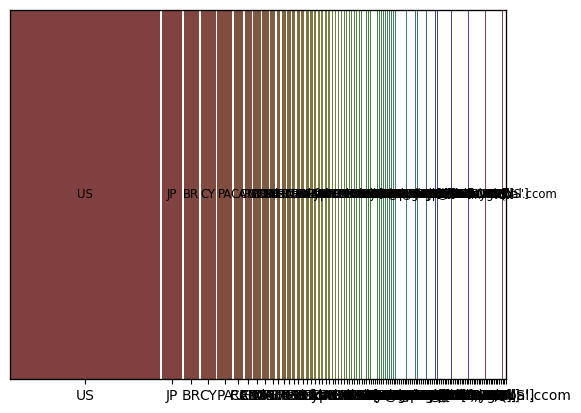

In [15]:
# Checking out the frequency via the mosaic plot

import statsmodels.graphics.mosaicplot as mp
freq_table = pd.Series(df_comp['Country']).value_counts()
mp.mosaic(freq_table);

Update Domain Age to numeric.

In [16]:
# As we can see here, domain is not a numeric value

df_comp['Domain_Age'].head()

5      8258 days, 10:18:27.488904
47     6872 days, 15:36:20.984730
78     3632 days, 20:35:54.335138
107    9059 days, 11:06:15.546248
122                           NaN
Name: Domain_Age, dtype: object

In [17]:
# Creating a function

def domain_age_num(domain_age):
   age = re.search('[0-9]+', domain_age).group()
   return age

In [18]:
df_comp['Domain_Age_num'] = df_comp['Domain_Age']

In [19]:
df_comp['Domain_Age_num'].isnull().sum()

270

Convert the Domain age from string to an integer

In [20]:
import re
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].fillna("10000")
df_comp['Domain_Age_num'] = df_comp['Domain_Age_num'].apply(domain_age_num)
df_comp['Domain_Age_num'].head()
df_comp['Domain_Age_num'] = pd.to_numeric(df_comp['Domain_Age_num'], errors='coerce')

array([[<Axes: title={'center': 'Domain_Age_num'}>]], dtype=object)

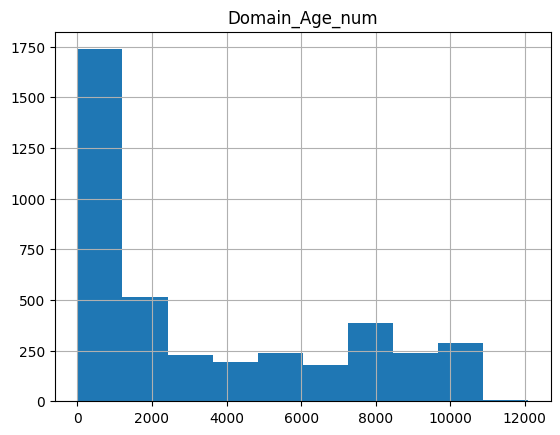

In [21]:
df_comp.hist(column='Domain_Age_num')

convert country to numeric code

In [22]:
# Country is a string, so we need to convert this to numeric, using the factorize function

df_comp['Country_Codes'] = pd.factorize(df_comp['Country'])[0]

```
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alexa_Rank               8460 non-null   float64
 1   Country                  5969 non-null   object
 2   distance_from_bad_words  8871 non-null   object



 3   len                      8871 non-null   int64  
 4   obfuscate_at_sign        8871 non-null   int64  
 5   subdomain                8871 non-null   int64  
 6   1gram                    8871 non-null   object
 7   entropy                  8871 non-null   float64
 8   longest_word             8871 non-null   object
 9   Page_Rank                4470 non-null   float64
 10  oc_8                     8871 non-null   int64  
 11  numeric_percentage       8871 non-null   float64
 12  2gram                    8871 non-null   object
 13  Registrant_Name          276 non-null    object
 14  Domain_Name              7727 non-null   object
 15  Domain_Age               8460 non-null   object
 16  hex_32                   8871 non-null   int64  
 17  dec_8                    8871 non-null   int64  
 18  3gram                    8871 non-null   object
 19  dec_32                   8871 non-null   int64  
 20  shortened                8810 non-null   float64
 21  sld                      8871 non-null   object
 22  tld                      8871 non-null   object
 23  Creation_Date_Time       7325 non-null   object
 24  puny_coded               8871 non-null   int64  
 25  char_distribution        8871 non-null   object
 26  Registrar                7219 non-null   object
 27  Name_Server_Count        8460 non-null   float64
 28  State                    5412 non-null   object
 29  typos                    8871 non-null   object
 30  Emails                   6639 non-null   object
 31  oc_32                    8871 non-null   int64  
 32  hex_8                    8871 non-null   int64  
 33  Organization             4866 non-null   object
 ```

In [23]:
# Resulting country numeric distribution

df_comp['Country_Codes'].describe()

count    4000.00000
mean        9.53850
std        19.52804
min        -1.00000
25%        -1.00000
50%         0.00000
75%        10.00000
max       113.00000
Name: Country_Codes, dtype: float64

Change the email field to first email and encode it to numeric

In [24]:
# Selecting only the first email, encoding to numeric

df_comp['Emails'].head()

5      ['abusecomplaints@registrarsafe.com', 'domain@...
47     ['abusecomplaints@markmonitor.com', 'whoisrequ...
78     ['abusecomplaints@markmonitor.com', 'web@dnsti...
107    ['abusecomplaints@markmonitor.com', 'domain-ad...
122                                                  NaN
Name: Emails, dtype: object

In [25]:
def get_first_email(email_list):
    for first in email_list.split(','):
      return first

df_comp['Emails'] = df_comp['Emails'].fillna("unknown@gmail.com")
df_comp['Emails_first'] = df_comp['Emails'].apply(get_first_email)
df_comp['Emails_first'].head(10)
df_comp['Emails_first'] = pd.factorize(df_comp['Emails_first'])[0]
df_comp['Emails_first'].describe()

count    4000.00000
mean       54.75750
std        73.45067
min         0.00000
25%         2.00000
50%        20.00000
75%        88.00000
max       324.00000
Name: Emails_first, dtype: float64

Change the distance from bad words to numeric.

In [63]:
def get_numeric_distance(distance_bad):
    dist_val = eval(distance_bad)
    return sum(dist_val.values())

df_comp['distance_from_bad_words'].head()
df_comp['distance_bad_numeric'] = df_comp['distance_from_bad_words'].apply(get_numeric_distance)
df_comp['distance_bad_numeric'].describe()

count    4000.000000
mean       20.240791
std        15.414849
min         0.000000
25%        10.788826
50%        15.933712
75%        22.152462
max       117.676136
Name: distance_bad_numeric, dtype: float64

Change Domain name to first domain name

In [64]:
import ast
def get_first_domain_name(domain_name):
    domain_name_val = ""
    try:
        domain_name_val = ast.literal_eval(domain_name)
        return domain_name_val[0]
    except (ValueError, SyntaxError):
      return domain_name_val


df_comp['Domain_Name'] = df_comp['Domain_Name'].fillna("unknown@unknown.com")
df_comp['Domain_Name_first'] = df_comp['Domain_Name'].apply(get_first_domain_name)
df_comp['Domain_Name_first'].head(10)
df_comp['Domain_Name_first'] = pd.factorize(df_comp['Domain_Name_first'])[0]
df_comp['Domain_Name_first'].describe()

count    4000.000000
mean      159.602000
std       250.029621
min         0.000000
25%         0.000000
50%         0.000000
75%       347.000000
max       918.000000
Name: Domain_Name_first, dtype: float64

Convert TLD to numeric codes

In [65]:
df_comp['tld_codes'] = pd.factorize(df_comp['tld'])[0]
df_comp['tld_codes'].describe()

count    4000.000000
mean       19.440250
std        38.132446
min        -1.000000
25%         0.000000
50%         0.000000
75%        17.000000
max       189.000000
Name: tld_codes, dtype: float64

Convert SLD to numeric codes

In [66]:
df_comp['sld_codes'] = pd.factorize(df_comp['sld'])[0]
df_comp['sld_codes'].describe()

count    4000.000000
mean     1187.095500
std       657.137976
min        -1.000000
25%       787.750000
50%      1143.500000
75%      1653.250000
max      2519.000000
Name: sld_codes, dtype: float64

In [70]:
#Gather features to run algorithm on

df_ml_algo = df_comp[['Alexa_Rank','Country_Codes', 'len', 'obfuscate_at_sign', 'subdomain', 'tld_codes', 'sld_codes', 'entropy', 'Page_Rank',
                      'numeric_percentage', 'Registrant_Name', 'Domain_Name_first', 'Domain_Age_num', 'shortened', 'puny_coded' ,
                      'Name_Server_Count', 'Emails_first', 'distance_bad_numeric', 'category']]

# 'Registrant_Name', , 'category'

In [68]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [69]:
gpu_available=False
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  gpu_available=False
  print('Not connected to a GPU')
else:
  gpu_available=True
  print(gpu_info)


/bin/bash: line 1: nvidia-smi: command not found


In [71]:
import pycaret

In [72]:
# Check to see if GPU is available for us to use through Colab

gpu_available

True

In [74]:
from pycaret.clustering import *
s = setup(df_ml_algo, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(4000, 19)"
2,Transformed data shape,"(4000, 138)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [75]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [76]:
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [77]:
# init setup on exp
exp.setup(df_ml_algo, session_id = 123, index=False, use_gpu=gpu_available, ignore_features='category')

,Description,Value
0,Session id,123
1,Original data shape,"(4000, 19)"
2,Transformed data shape,"(4000, 138)"
3,Ignore features,8
4,Numeric features,14
5,Categorical features,4
6,Rows with missing values,98.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [78]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [79]:
model = create_model("kmeans", num_clusters= 4)
evaluate_model(model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8906,36764.8184,0.4119,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [80]:
assign_model(model)

,Alexa_Rank,Country_Codes,len,obfuscate_at_sign,subdomain,tld_codes,sld_codes,entropy,Page_Rank,numeric_percentage,Registrant_Name,Domain_Name_first,Domain_Age_num,shortened,puny_coded,Name_Server_Count,Emails_first,distance_bad_numeric,Cluster
0,7.0,0,9,0,0.0,0,0,2.595489,NaN,0.000000,NaN,0,8258,-1.0,0,2.0,0,7.320076,Cluster 0
1,9.0,0,12,0,1.0,1,1,2.723308,NaN,0.000000,NaN,1,6872,-1.0,0,6.0,1,8.268939,Cluster 0
2,124.0,0,13,0,1.0,0,2,2.742338,NaN,0.000000,NaN,2,3632,-1.0,0,16.0,1,10.971591,Cluster 0
3,11.0,0,6,0,0.0,0,3,1.820802,NaN,0.000000,NaN,3,9059,-1.0,0,10.0,1,5.696970,Cluster 0
4,NaN,-1,7,0,0.0,0,4,2.406304,NaN,0.000000,NaN,0,10000,-1.0,0,NaN,2,16.134470,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,399966.0,0,10,0,0.0,0,2516,2.589735,-1.0,0.000000,NaN,0,4809,-1.0,0,2.0,20,10.653409,Cluster 0
3996,-1.0,92,9,0,0.0,0,2517,2.067168,-1.0,0.000000,NaN,0,2262,-1.0,0,6.0,66,10.636364,Cluster 0
3997,-1.0,-1,12,0,0.0,22,2518,3.119549,-1.0,0.000000,DENISON COUNTY CARAVAN PARK PTY. LTD.,0,0,-1.0,0,2.0,2,20.880682,Cluster 0
3998,-1.0,19,16,0,0.0,18,2519,3.327820,-1.0,0.000000,NaN,0,0,-1.0,0,0.0,2,21.429924,Cluster 0


In [81]:
save_model(model, 'kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Alexa_Rank', 'Country_Codes',
                                              'len', 'subdomain', 'tld_codes',
                                              'sld_codes', 'entropy',
                                              'Page_Rank', 'numeric_percentage',
                                              'Domain_Name_first',
                                              'Domain_Age_num', 'puny_coded',
                                              'Emails_first',
                                              'distance_bad_numeric'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['obfuscate_at_sign',
                            